In [38]:
import os
import pandas as pd
import pyam
# Import the library to efficiently search variables
import triesearching

# Timseseries Plot

In [43]:
cwd = os.getcwd()

# Complete the path to the results file (in IAMC format)
path = "..\\Conversion-Script\\File_Converted\\"

try:
    df = pyam.IamDataFrame(path + "Baseline no policies no CO2taxconverted.csv")
except:
    print("ERROR opening the file with results in IAMC format")

[INFO] 14:09:20 - pyam.core: Reading file ..\Conversion-Script\File_Converted\Baseline no policies no CO2taxconverted.csv
c:\Users\34670\.conda\envs\wiliamcformat\Lib\site-packages\pyam\utils.py:318: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(dropna=True)


### Completions Helpers

In [40]:
# Creation of the trie (tree data structure) of our results
trie = triesearching.Trie()

for x in df.variable:
    trie.insert(x)

In [41]:
# Enter the prefix of the variable you want to see.

prefix = input("Enter a prefix to search for completions: ")
completions = triesearching.suggest_completions(trie, prefix)
print("Completions:", "\n".join(completions))


Completions: Secondary Energy|Electricity And Heat|Gas Fuels|w/ CCS
Secondary Energy|Electricity And Heat|Gas Fuels|w/o CCS
Secondary Energy|Electricity And Heat|Geothermal|Deactivated
Secondary Energy|Electricity And Heat|Liquid Fuels|w/ CCS
Secondary Energy|Electricity And Heat|Liquid Fuels|w/o CCS
Secondary Energy|Electricity And Heat|Solid|Biomass|w/ CCS
Secondary Energy|Electricity And Heat|Solid|Biomass|w/o CCS
Secondary Energy|Electricity And Heat|Solid|Fossil|w/ CCS
Secondary Energy|Electricity And Heat|Solid|Fossil|w/o CCS
Secondary Energy|Electricity And Heat|Waste
Secondary Energy|Electricity|Gas Fuels|w/ CCS
Secondary Energy|Electricity|Gas Fuels|w/o CCS
Secondary Energy|Electricity|Geothermal
Secondary Energy|Electricity|Hydro|Dammed
Secondary Energy|Electricity|Hydro|Run Of River
Secondary Energy|Electricity|Liquid Fuels|w/ CCS
Secondary Energy|Electricity|Liquid Fuels|w/o CCS
Secondary Energy|Electricity|Nuclear
Secondary Energy|Electricity|Ocean
Secondary Energy|Electri

2005  \
model  scenario                       region                               variable                                unit              
WILIAM Baseline no policies no CO2tax China                                Secondary Energy|Electricity|Geothermal EJ/yr  0.000725   
                                      East Asia and Oceania                Secondary Energy|Electricity|Geothermal EJ/yr  0.098442   
                                      European Union (27 member countries) Secondary Energy|Electricity|Geothermal EJ/yr  0.017934   
                                      India                                Secondary Energy|Electricity|Geothermal EJ/yr  0.000000   
                                      Latin America                        Secondary Energy|Electricity|Geothermal EJ/yr  0.004330   
                                      Rest of the World                    Secondary Energy|Electricity|Geothermal EJ/yr  0.023452   
                                      Russia                               Secondary Energy|Electricity|Geothermal EJ/yr  0.002061   
                                      United Kingdom                       Secondary Energy|Electricity|Geothermal EJ/yr  0.000000   
                                      United States, Mexico and Canada     Secondary Energy|Electricity|Geothermal EJ/yr  0.084363   

                                                                                                                              2006  \
model  scenario                       region                               variable                                unit              
WILIAM Baseline no policies no CO2tax China                                Secondary Energy|Electricity|Geothermal EJ/yr  0.000725   
                                      East Asia and Oceania                Secondary Energy|Electricity|Geothermal EJ/yr  0.099530   
                                      European Union (27 member countries) Secondary Energy|Electricity|Geothermal EJ/yr  0.018254   
                                      India                                Secondary Energy|Electricity|Geothermal EJ/yr  0.000000   
                                      Latin America                        Secondary Energy|Electricity|Geothermal EJ/yr  0.004330   
                                      Rest of the World                    Secondary Energy|Electricity|Geothermal EJ/yr  0.024887   
                                      Russia                               Secondary Energy|Electricity|Geothermal EJ/yr  0.002089   
                                      United Kingdom                       Secondary Energy|Electricity|Geothermal EJ/yr  0.000000   
                                      United States, Mexico and Canada     Secondary Energy|Electricity|Geothermal EJ/yr  0.083776   

                                                                                                                              2007  \
model  scenario                       region                               variable                                unit              
WILIAM Baseline no policies no CO2tax China                                Secondary Energy|Electricity|Geothermal EJ/yr  0.000688   
                                      East Asia and Oceania                Secondary Energy|Electricity|Geothermal EJ/yr  0.103210   
                                      European Union (27 member countries) Secondary Energy|Electricity|Geothermal EJ/yr  0.018291   
                                      India                                Secondary Energy|Electricity|Geothermal EJ/yr  0.000000   
                                      Latin America                        Secondary Energy|Electricity|Geothermal EJ/yr  0.004330   
                                      Rest of the World                    Secondary Energy|Electricity|Geothermal EJ/yr  0.028227   
                                      Russia                               Secondary Energy|Electricity|

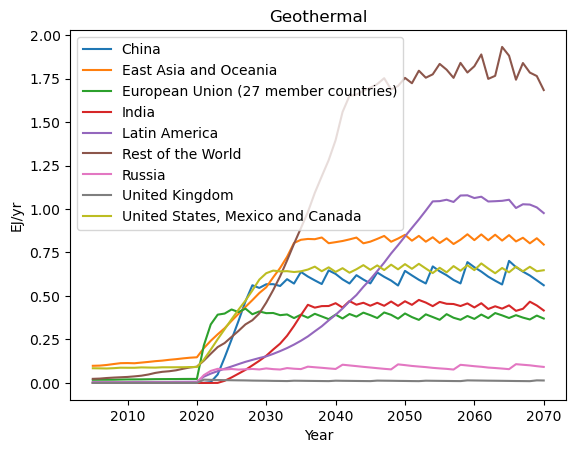

In [42]:
# Choose one of your wanted variable with the completion
model, scenario = "WILIAM", "Baseline no policies no CO2tax"
variable = input("Input the name of the variable")
title = input("Enter the title of the chart")

data = df.filter(model=model, scenario=scenario, variable=variable).filter(region="World", keep=False)


data.plot(color="region", title= title)
data.timeseries()
